In [1]:
from IPython.display import HTML
import warnings
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\AI\\Facebook Academy\\Facebook Analytics Academy\\sender_data.csv")
#print(ds)
df.head()

,Unnamed: 0,message_id,user_id_sender,date,time_sent,message_type,sender_carrier,sender_device_type,sender_device_os,sender_device_make
0,1,147420,14850129222,2017-12-24,11:09:43,text,O2 / Telefonica,mobile,Android,HTC
1,2,123567,149847316413,2017-12-24,05:25:05,text,AT&T,mobile,Android,LG
2,3,103163,15008022084,2017-12-24,00:35:43,text,O2 / Telefonica,tablet,iOS,iPad
3,4,144538,155489657603,2017-12-24,10:28:58,text,Vodafone,mobile,Android,Huawei
4,5,107753,161201232269,2017-12-24,01:40:49,photo,O2 / Telefonica,mobile,Android,Samsung


In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,message_id,user_id_sender,date,time_sent,message_type,sender_carrier,sender_device_type,sender_device_os,sender_device_make
0,147420,14850129222,2017-12-24,11:09:43,text,O2 / Telefonica,mobile,Android,HTC
1,123567,149847316413,2017-12-24,05:25:05,text,AT&T,mobile,Android,LG
2,103163,15008022084,2017-12-24,00:35:43,text,O2 / Telefonica,tablet,iOS,iPad
3,144538,155489657603,2017-12-24,10:28:58,text,Vodafone,mobile,Android,Huawei
4,107753,161201232269,2017-12-24,01:40:49,photo,O2 / Telefonica,mobile,Android,Samsung


In [7]:
df.shape

(332781, 9)

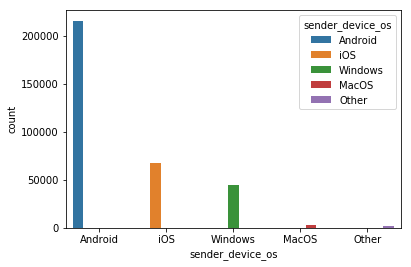

In [8]:
sns.countplot(x = 'sender_device_os',data = df,hue = 'sender_device_os')

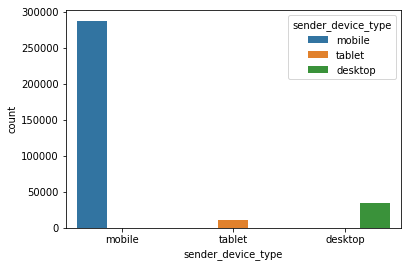

In [9]:
sns.countplot(x = 'sender_device_type',data = df,hue = 'sender_device_type')

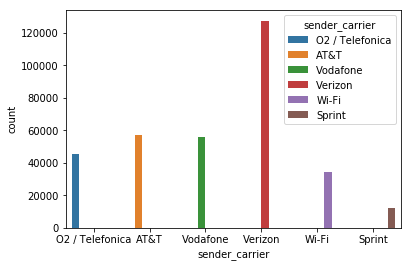

In [10]:
sns.countplot(x = 'sender_carrier',data = df,hue = 'sender_carrier')

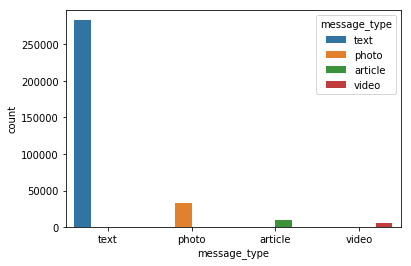

In [11]:
sns.countplot(x = 'message_type',data = df,hue = 'message_type')

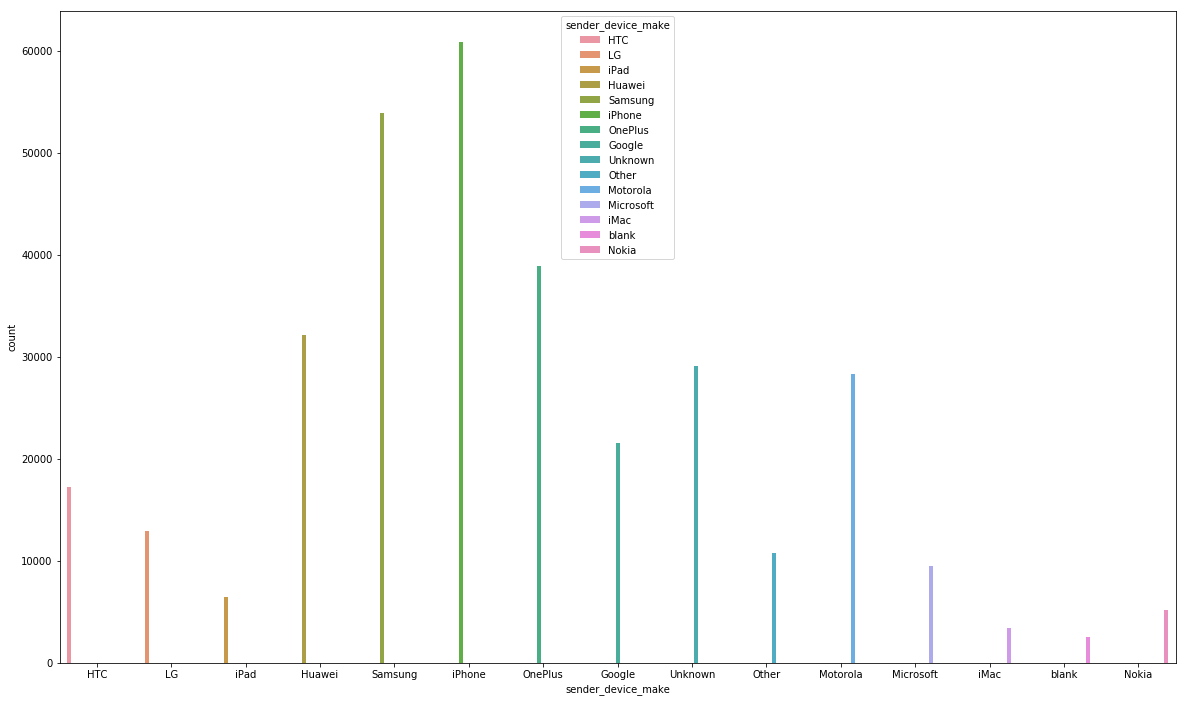

In [12]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'sender_device_make',data = df,hue = 'sender_device_make')

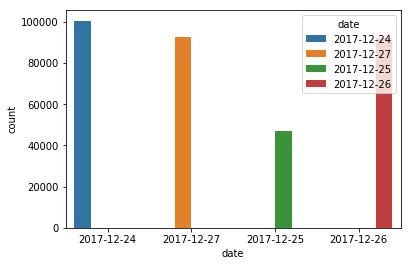

In [13]:
sns.countplot(x = 'date',data = df,hue = 'date')

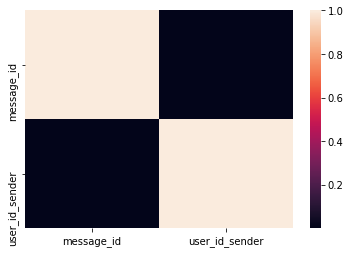

In [14]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [15]:
print(len(df.duplicated('user_id_sender', keep=False)))
print(len(df.duplicated('time_sent', keep=False)))

332781
332781


In [16]:
# https://datatofish.com/count-duplicates-pandas/
duplicatesnumber = df.pivot_table(index=['user_id_sender'], aggfunc='size')
sortedlist = duplicatesnumber.sort_values(ascending = False) 
print(sortedlist)

user_id_sender
301582240016    106
19492391373     100
945876184863    100
836230774757    100
937262275848     97
386172527130     96
974397190688     96
264438537493     96
426340696186     96
495079708803     96
48438624602      95
672519459224     94
488418712613     94
556836178148     94
918253207417     94
327620839129     94
605659260351     94
706641622541     94
190236188015     93
237578846112     93
924498743959     93
6386687731       93
415164580079     93
273300371028     92
248440351256     92
15348747980      92
197314691387     92
755269169357     92
733256754026     92
262193243276     92
               ... 
97200716602      39
590679487310     39
92958238691      39
929290721596     39
228778819465     39
466354770670     39
35744250372      39
75031740990      39
35860845106      39
441633716175     39
953740117387     39
186050410774     38
992988404763     38
798232858189     38
862698974189     38
816212118316     38
567302694330     38
111436640926     37
32626

Mean number of messages an user sended throughout the considered period 66.5562


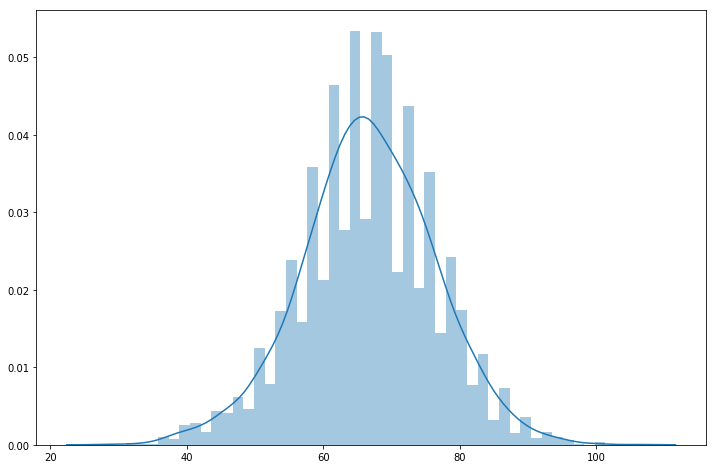

In [17]:
plt.figure(figsize = (12,8))
sns.distplot(sortedlist)
print("Mean number of messages an user sended throughout the considered period",np.mean(sortedlist))

In [18]:
r = np.array(sortedlist.index[0:20].values)
r2 = np.array(sortedlist[0:20])
d = {'user': r, 'number of messages': r2}
df2 = pd.DataFrame(data=d)
df2.head()

,user,number of messages
0,301582240016,106
1,19492391373,100
2,945876184863,100
3,836230774757,100
4,937262275848,97


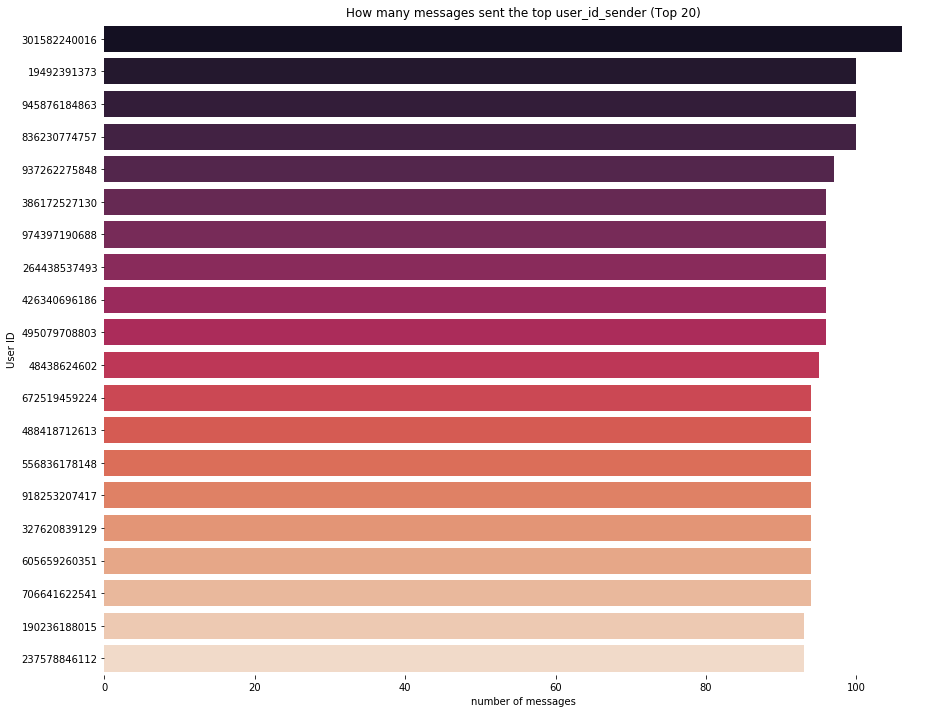

In [19]:
plt.figure(figsize = (15,12))
y_pos = np.arange(len(df2['user']))
sns.barplot(y =y_pos, x=df2['number of messages'], palette = 'rocket', orient = 'h')
plt.title("How many messages sent the top user_id_sender (Top 20)")
plt.yticks(y_pos, df2['user'])
plt.ylabel('User ID')
#plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)

In [20]:
duplicatesnumber = df.pivot_table(index=['time_sent'], aggfunc='size')
#print(duplicatesnumber)
sortedlist = duplicatesnumber.sort_values(ascending = False) 
print(sortedlist)

time_sent
08:57:30    15
12:09:17    14
22:24:33    14
23:26:47    14
07:42:52    13
08:27:37    13
21:28:54    13
09:42:33    13
05:24:47    13
14:04:28    13
04:27:46    13
03:53:02    13
15:21:14    13
01:15:49    13
08:42:27    13
16:37:17    13
02:03:49    13
13:03:33    13
05:07:11    13
04:46:43    13
10:29:37    13
11:48:11    13
13:56:34    12
12:04:28    12
16:14:02    12
12:04:05    12
18:38:09    12
23:49:50    12
12:29:10    12
12:07:00    12
            ..
20:21:36     1
21:24:40     1
02:14:27     1
21:24:42     1
20:21:43     1
16:50:23     1
16:50:24     1
11:52:59     1
06:06:47     1
02:14:17     1
02:14:15     1
02:14:50     1
11:53:37     1
02:15:28     1
11:54:04     1
02:15:27     1
16:49:00     1
16:49:02     1
20:21:49     1
02:15:19     1
22:40:30     1
16:49:21     1
23:30:33     1
21:24:29     1
06:05:56     1
11:53:55     1
06:06:02     1
20:21:46     1
11:53:50     1
17:06:11     1
Length: 84625, dtype: int64


In [21]:
r = np.array(sortedlist.index[0:20].values)
r2 = np.array(sortedlist[0:20])
d = {'user': r, 'number of messages': r2}
df2 = pd.DataFrame(data=d)
df2.head()

,user,number of messages
0,08:57:30,15
1,12:09:17,14
2,22:24:33,14
3,23:26:47,14
4,07:42:52,13


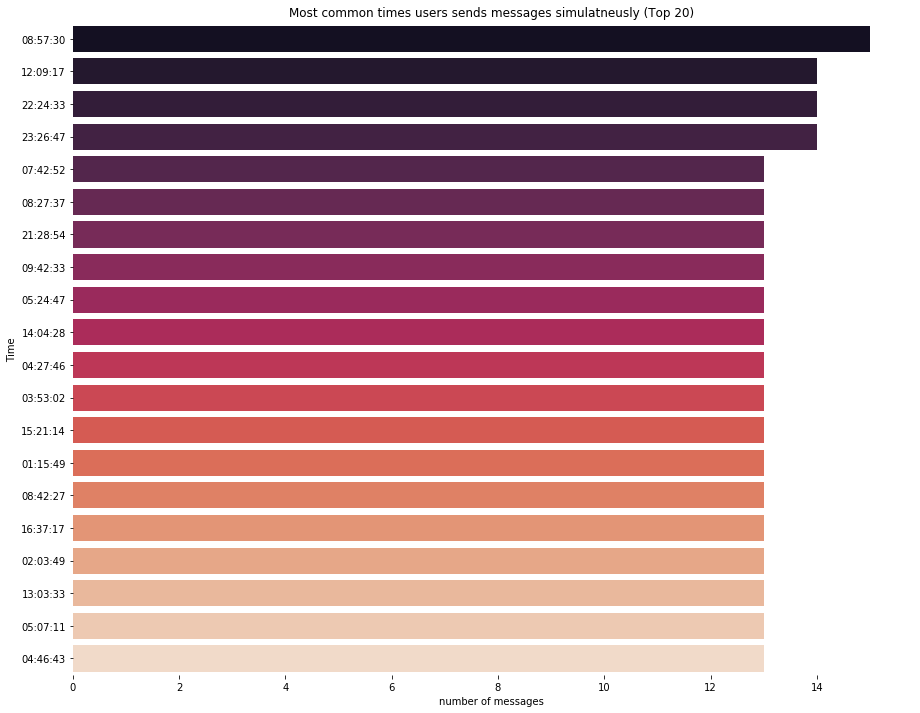

In [22]:
plt.figure(figsize = (15,12))
y_pos = np.arange(len(df2['user']))
sns.barplot(y =y_pos, x=df2['number of messages'], palette = 'rocket', orient = 'h')
plt.title("Most common times users sends messages simulatneusly (Top 20)")
plt.yticks(y_pos, df2['user'])
plt.ylabel('Time')
#plt.xticks(rotation = 90)
sns.despine(left=True, bottom=True)

In [23]:
# Converting time format from h:t:s to h
for i in range(0, 332781):
    df.iloc[i,3] = df.iloc[i,3].split(':', 1)[0]

#print(len(df.iloc[:,3]))
print(df.iloc[:,3])

0         11
1         05
2         00
3         10
4         01
5         20
6         22
7         01
8         07
9         02
10        11
11        17
12        22
13        06
14        04
15        10
16        02
17        17
18        15
19        20
20        15
21        23
22        04
23        20
24        22
25        11
26        03
27        18
28        16
29        21
          ..
332751    01
332752    23
332753    03
332754    00
332755    09
332756    19
332757    04
332758    05
332759    02
332760    02
332761    09
332762    00
332763    22
332764    06
332765    23
332766    05
332767    11
332768    20
332769    02
332770    15
332771    04
332772    09
332773    10
332774    16
332775    17
332776    13
332777    19
332778    21
332779    10
332780    22
Name: time_sent, Length: 332781, dtype: object


In [27]:
hourmessage = df.set_index(["time_sent", "user_id_sender"]).count(level="time_sent")
print(hourmessage)

           message_id   date  message_type  sender_carrier  \
time_sent                                                    
00              13803  13803         13803           13803   
01              13925  13925         13925           13925   
02              13920  13920         13920           13920   
03              13965  13965         13965           13965   
04              13873  13873         13873           13873   
05              13641  13641         13641           13641   
06              13989  13989         13989           13989   
07              13708  13708         13708           13708   
08              13958  13958         13958           13958   
09              13818  13818         13818           13818   
10              13815  13815         13815           13815   
11              13932  13932         13932           13932   
12              13755  13755         13755           13755   
13              13897  13897         13897           13897   
14      

In [34]:
print(hourmessage['message_id'])
n = np.array(hourmessage['message_id'])
print(n)

time_sent
00    13803
01    13925
02    13920
03    13965
04    13873
05    13641
06    13989
07    13708
08    13958
09    13818
10    13815
11    13932
12    13755
13    13897
14    13900
15    13953
16    13913
17    13911
18    13835
19    13886
20    13820
21    13993
22    13697
23    13874
Name: message_id, dtype: int64
[13803 13925 13920 13965 13873 13641 13989 13708 13958 13818 13815 13932
 13755 13897 13900 13953 13913 13911 13835 13886 13820 13993 13697 13874]


In [32]:
print(hourmessage['message_id'].index)
h = np.array(hourmessage['message_id'].index)
print(h)

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
      dtype='object', name='time_sent')
['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23']


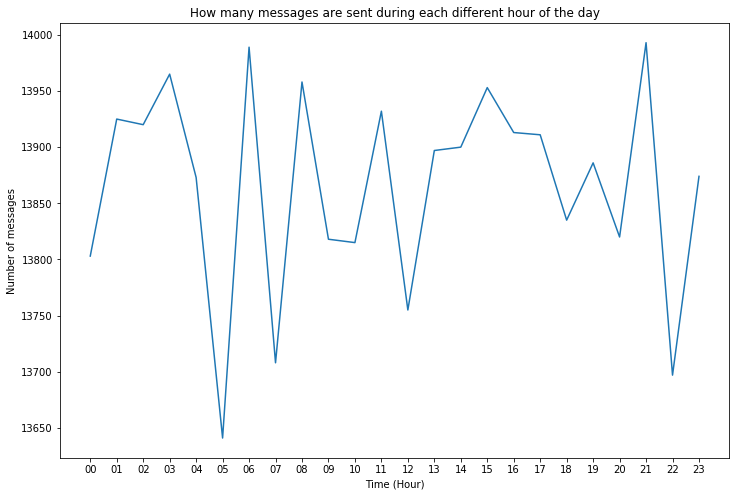

In [46]:
plt.figure(figsize = (12,8))
#sns.scatterplot(hours,messnum)
plt.title("How many messages are sent during each different hour of the day")
plt.xlabel("Time (Hour)")
plt.ylabel("Number of messages")
plt.plot(h,n)

Text(0.5,0,'Time (Hour)')

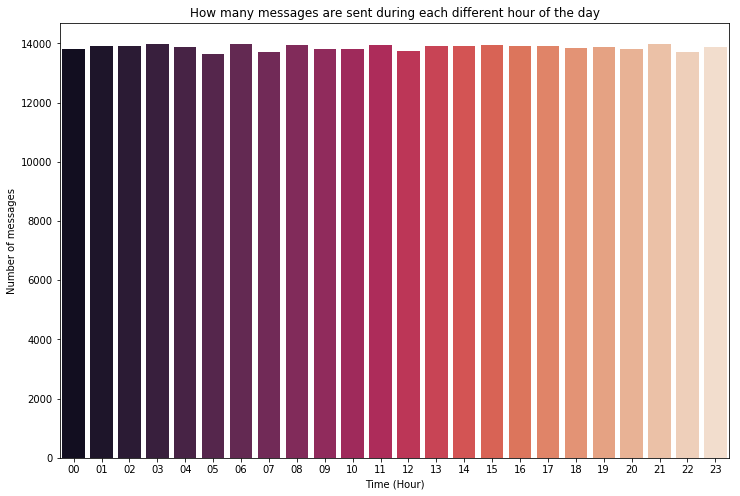

In [47]:
plt.figure(figsize = (12,8))
sns.barplot(y =n, x=h, palette = 'rocket')
plt.title("How many messages are sent during each different hour of the day")
plt.ylabel('Number of messages')
plt.xlabel("Time (Hour)")

In [37]:
# messnum =[13803,13925,13920,13965,13873,13641,13989,13708,13958,13818,13815,13932,13755,13897,13900,13953,13913,13911,13835,
#           13886,13820,13993,13697,13874]
# hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

In [48]:
duplicatesnumber = df.pivot_table(index=['message_id'], aggfunc='size')
sortedlist = duplicatesnumber.sort_values(ascending = False) 
print("There are no duplicates in message_id, each message sent has his unique id")
print(sortedlist)

There are no duplicates in message_id, each message sent has his unique id
message_id
500000    1
223358    1
223320    1
223322    1
223324    1
223327    1
223333    1
223335    1
223336    1
223338    1
223343    1
223344    1
223345    1
223346    1
223347    1
223348    1
223350    1
223352    1
223354    1
223319    1
223317    1
223315    1
223300    1
223283    1
223286    1
223287    1
223290    1
223293    1
223298    1
223299    1
         ..
380704    1
380691    1
380705    1
380706    1
380707    1
380708    1
380709    1
380711    1
380712    1
380692    1
380690    1
380671    1
380679    1
380672    1
380673    1
380674    1
380675    1
380676    1
380677    1
380678    1
380680    1
380689    1
380681    1
380682    1
380683    1
380684    1
380686    1
380687    1
380688    1
100671    1
Length: 332781, dtype: int64
